In [250]:
import random
import numpy as np 
import pandas as pd
import os
import sys
import PIL
import re
import json
from pandas.io.json import json_normalize

# plt
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab 
#change deff size
from pylab import rcParams
rcParams['figure.figsize'] = 25, 15
plt.rcParams["figure.figsize"] = (25,25)
#graps in svg
%config InlineBackend.figure_format = 'svg' 
%matplotlib inline
# Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)

import seaborn as sns
sns.set_theme(style="whitegrid")

In [130]:
DATA_DIR = 'Dataset/'
json_dir = DATA_DIR + 'data.json'

with open(json_dir) as json_data:
    data = json.load(json_data)

train = pd.DataFrame(data['initial_bundle'])
test = pd.DataFrame(data['test_bundle'])

preprocces tables


In [150]:
df = train[:][0:10]
def fill_values(cell, key): # fill value with exceptoin
    try:
        return cell[str(key)]
    except:
        #print(cell)
        return cell

def is_dict(col):
    for i in range(len(col)):
        if type(col[i]) == dict:
            return i
    return False

def expand_dict_agg(df):
    dfnew = df.copy()
    isend = False
    while isend is False:    
        isend = True    
        for col in dfnew.columns:
            keys_col = is_dict(dfnew[col])
            if keys_col != False: # expand dicts to columns
                isend = False
                
                for i in dfnew[col][keys_col].keys():
                    dfnew[col+'_'+ (i)] = dfnew[col].apply(lambda x: fill_values(x,i))
                    
                dfnew  = dfnew.drop(columns = col)
    
    return dfnew
df = expand_dict_agg(df)


In [151]:
df

,id,tags,file,type_id,type_name,category_id,category_name,category_type_id,category_type_name,subcategory_id,subcategory_name,subcategory_category_id,subcategory_category_name,subcategory_category_type_id,subcategory_category_type_name
0,2703,"[2022, doha, fan, fifa, fooball, qatar, zone]",data/bf0d8c12-950b-4760-8deb-3a562cd7fe5b.jpg,20,Showcase & Finals,133,Installations,20,Showcase & Finals,NaN,None,NaN,None,NaN,None
1,3337,"[cyber, cyberpunk, neon, pixel, sign]",data/021d56b2-305b-443a-b45b-17ca7eafc3e9.jpg,2,Textures,175,cyber,2,Textures,NaN,None,NaN,None,NaN,None
2,2974,"[castle, ruine, stone, wall]",data/9c3909df-21d4-4e84-805d-ade67f2df990.png,1,3D Models,4,Buildings,1,3D Models,51.0,Destroyed,4.0,Buildings,1.0,3D Models
3,1207,"[lamps, red, round, studios]",data/cd06f94b-179e-4634-87eb-d1b77cd06bfe.jpg,3,HDRI,112,Light Textures,3,HDRI,149.0,Lamps,112.0,Light Textures,3.0,HDRI
4,1151,"[rectangle, softbox, studios, warm]",data/e0734308-0fe8-4145-a968-17039966b48c.jpg,3,HDRI,112,Light Textures,3,HDRI,148.0,Softbox,112.0,Light Textures,3.0,HDRI
5,1161,"[lamps, rectangle, red, studios]",data/23d96eff-3fe0-4c57-8617-ad2a3f8aa878.jpg,3,HDRI,112,Light Textures,3,HDRI,149.0,Lamps,112.0,Light Textures,3.0,HDRI
6,352,"[mclaren, s-class, sportcar, s-segment, supercar]",data/3b63ba38-56ed-4429-bc9a-0f43096fd2c5.png,1,3D Models,1,Vehicles,1,3D Models,1.0,Cars,1.0,Vehicles,1.0,3D Models
7,2635,"[moscow, ostozhenka, restaurant, russia, tiflis]",data/c7e3c423-aabe-41a2-9d20-d58e47875a2e.png,1,3D Models,146,Architecture,1,3D Models,167.0,Russian,146.0,Architecture,1.0,3D Models
8,572,"[architecture, building, indoor, medium_contra...",data/d1197ad4-e55b-44a7-a27c-ae7ea1b55afa.png,3,HDRI,29,Indoor,3,HDRI,NaN,None,NaN,None,NaN,None
9,1259,"[cosmos, crater, moon, satellite, solar_system...",data/3127d08d-6a58-4748-afe1-a417b9ec15ad.jpg,4,Footages,113,Space,4,Footages,NaN,None,NaN,None,NaN,None


In [152]:
train = expand_dict_agg(train)
test = expand_dict_agg(test)

In [153]:
train.sample(2)

,id,tags,file,type_id,type_name,category_id,category_name,category_type_id,category_type_name,subcategory_id,subcategory_name,subcategory_category_id,subcategory_category_name,subcategory_category_type_id,subcategory_category_type_name
918,2792,"[bench, bin, furniture, garbage, recycle, rubb...",data/921b6a89-bfd4-4e67-a012-6634f53fbb7e.png,1,3D Models,7,Interior,1,3D Models,70.0,Furniture,7.0,Interior,1.0,3D Models
105,3276,"[dust, explosion]",data/144245f5-5782-4690-9a6d-c5796520001b.jpg,4,Footages,116,Dust,4,Footages,NaN,None,NaN,None,NaN,None


In [154]:
test.head(2)

,id,tags,file,type_id,type_name,category_id,category_name,subcategory_id,subcategory_name,category_type_id,category_type_name,subcategory_category_id,subcategory_category_name,subcategory_category_type_id,subcategory_category_type_name
0,2472,"[decor, outdoor, plants, pot, street, urban]",data/7e5ba16b-6223-41f3-8f64-07ea079ece48.png,1,3D Models,11.0,Plants,98.0,Home,1.0,3D Models,11.0,Plants,1.0,3D Models
1,2533,"[architecture, buildings, cottage]",data/ef6e4cfe-c96a-4cd1-b30c-0e966dc46c83.png,1,3D Models,4.0,Buildings,44.0,Medium Sized,1.0,3D Models,4.0,Buildings,1.0,3D Models


Samples and statistic

In [235]:
random_image = train[(train.subcategory_category_name == "Vehicles")| (train.subcategory_category_name == "Plants")].sample(n = 1)
random_image_paths = random_image['file'].values
for index, path in enumerate(random_image_paths):
    im = PIL.Image.open(DATA_DIR + str(path))
print('image_size=',im.size)

image_size= (360, 360)


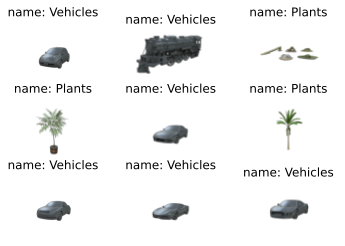

In [236]:
random_image = train[(train.subcategory_category_name == "Vehicles")| (train.subcategory_category_name == "Plants")].sample(n = 9)
random_image_paths = random_image['file'].values
random_image_type = random_image['subcategory_category_name'].values

for index, path in enumerate(random_image_paths):
    im = PIL.Image.open(DATA_DIR + str(path))
    plt.subplot(3, 3, index + 1)
    plt.imshow(im)
    plt.title('name: ' + str(random_image_type[index]))
    plt.axis('off')
plt.show()

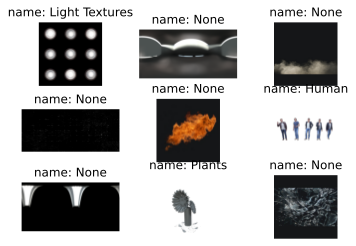

In [237]:
random_image = test.sample(n = 9)
random_image_paths = random_image['file'].values
random_image_type = random_image['subcategory_category_name'].values

for index, path in enumerate(random_image_paths):
    im = PIL.Image.open(DATA_DIR + str(path))
    plt.subplot(3, 3, index + 1)
    plt.imshow(im)
    plt.title('name: ' + str(random_image_type[index]))
    plt.axis('off')
plt.show()

In [166]:
len(test[test.subcategory_category_name.isnull() ])

682

In [167]:
for col in test.columns:
    print('train',col,'isnull count:',len(train[train[col].isnull() ]))
    print('test',col,'isnull count:',len(test[test[col].isnull() ]))

train id isnull count: 0
test id isnull count: 0
train tags isnull count: 0
test tags isnull count: 0
train file isnull count: 0
test file isnull count: 0
train type_id isnull count: 0
test type_id isnull count: 0
train type_name isnull count: 0
test type_name isnull count: 0
train category_id isnull count: 0
test category_id isnull count: 2
train category_name isnull count: 0
test category_name isnull count: 2
train subcategory_id isnull count: 687
test subcategory_id isnull count: 682
train subcategory_name isnull count: 687
test subcategory_name isnull count: 682
train category_type_id isnull count: 0
test category_type_id isnull count: 2
train category_type_name isnull count: 0
test category_type_name isnull count: 2
train subcategory_category_id isnull count: 687
test subcategory_category_id isnull count: 682
train subcategory_category_name isnull count: 687
test subcategory_category_name isnull count: 682
train subcategory_category_type_id isnull count: 687
test subcategory_categ

In [176]:
train_d={}
subs_nd={}
sub_nuls = train[train.subcategory_category_name.isnull()]
for column in ['type_name','category_name','category_type_name']:
    train_d[column]=list(train[column].unique())
    subs_nd[column]=list(sub_nuls[column].unique())

In [178]:
subs_nd

{'type_name': ['Showcase & Finals',
  'Textures',
  'HDRI',
  'Footages',
  '3D Models',
  'VJ Loops',
  'Setups',
  'HUD',
  'Rigs',
  'VDB',
  'Creative Concepts',
  'Shaders'],
 'category_name': ['Installations',
  'cyber',
  'Indoor',
  'Space',
  'Kitbash',
  'Other',
  'Splashes',
  'Dust',
  'Sparks',
  'Outdoor',
  'Particles',
  'Studios',
  'Debris',
  'People',
  'Noises',
  'Explosions',
  'Abstract',
  'Stages',
  'Toys and games',
  'Shapes',
  'LED Facades',
  'Dome',
  'Background',
  'Animals',
  'Lines',
  'Typography',
  'Smoke',
  'Sky',
  'Objects',
  'Windows',
  'Light',
  'Gradients',
  'Exterior',
  'Mapping',
  'Digital',
  'Stone',
  'Glass',
  'Real People',
  'Clouds',
  'Presentations',
  'Signs & Symbols',
  'Grids & Dots',
  'Impulse',
  'Performances',
  'Flame',
  'Stones',
  'Pointers',
  'Flares',
  'Data Flows',
  'Map',
  'Grunge',
  'Special',
  'Grids',
  'Metals',
  'Dirt',
  'Identity',
  'Wipe Mark'],
 'category_type_name': ['Showcase & Finals

In [179]:
train_d

{'type_name': ['Showcase & Finals',
  'Textures',
  '3D Models',
  'HDRI',
  'Footages',
  'VJ Loops',
  'Setups',
  'HUD',
  'Rigs',
  'Music & SFX',
  'VDB',
  'Creative Concepts',
  'Shaders'],
 'category_name': ['Installations',
  'cyber',
  'Buildings',
  'Light Textures',
  'Vehicles',
  'Architecture',
  'Indoor',
  'Space',
  'Kitbash',
  'Plants',
  'Human',
  'Other',
  'Splashes',
  'Dust',
  'Outdoor',
  'Sparks',
  'Simulation',
  'Particles',
  'Creatures',
  'Studios',
  'Debris',
  'People',
  'Noises',
  'Explosions',
  'Abstract',
  'Stages',
  'Industrial',
  'Electronics',
  'Toys and games',
  'Shapes',
  'Science',
  'LED Facades',
  'Dome',
  'Background',
  'Interior',
  'Animals',
  'Lines',
  'SciFi',
  'Typography',
  'Smoke',
  'Sky',
  'Objects',
  'Windows',
  'Light',
  'Gradients',
  'Stock',
  'Walls',
  'Exterior',
  'Mapping',
  'Digital',
  'Stone',
  'Glass',
  'Real People',
  'Clouds',
  'Presentations',
  'Signs & Symbols',
  'Grids & Dots',
  'N

In [239]:
print(len(train[(train.subcategory_category_name == "Vehicles")| (train.subcategory_category_name == "Plants")]))
print(len(train[(train.subcategory_category_name != "Vehicles")& (train.subcategory_category_name != "Plants")]))
print(len(train[(train.category_name == "Vehicles")| (train.subcategory_category_name == "Plants")]))
print(len(train[(train.category_name != "Vehicles")& (train.subcategory_category_name != "Plants")]))

325
1233
325
1233


In [249]:
plans_tags = {}
for row in train[train.category_name == 'Plants'].tags: 
    for tag in row:
        plans_tags[tag] = plans_tags.get(tag, 0) +1

In [260]:
x = []
y = []
for key, value in plans_tags.items():
    x.append(key)
    y.append(value)
axes = pd.DataFrame({'keys':x, 'values':y})

In [291]:
top10tags = list(axes.sort_values('values', ascending=False)['keys'][:10])
top10tags.remove('decor')
top10tags

['nature',
 'plants',
 'grass',
 'plant',
 'tree',
 'meadow',
 'flowers',
 'forest',
 'leaf']

In [292]:
#df = train[0:10].copy()
def is_contain(tags):
    for tag in tags:
        if tag in top10tags:
            return 1
    return 0
#df['is_tag_in']= df['tags'].apply(lambda x: is_contain(x))
#df
train['is_tag_in']= train['tags'].apply(lambda x: is_contain(x))

In [339]:
train[(train.is_tag_in == 1) & (train.category_name != 'Plants')]

,id,tags,file,type_id,type_name,category_id,category_name,category_type_id,category_type_name,subcategory_id,subcategory_name,subcategory_category_id,subcategory_category_name,subcategory_category_type_id,subcategory_category_type_name,is_tag_in,v_tag,target,target_2
24,579,"[architecture, city, grass, high-contrast, meg...",data/4b24172d-4407-4014-bf2f-7dc26a1c5aca.jpg,3,HDRI,30,Outdoor,3,HDRI,NaN,None,NaN,None,NaN,None,1,0,2,2
63,571,"[grass, morning/afternoon, natural_light, natu...",data/d2598c87-eacc-4f3b-853c-ded52fe7bd33.png,3,HDRI,30,Outdoor,3,HDRI,NaN,None,NaN,None,NaN,None,1,0,2,2
132,635,"[desert, high-contrast, natural_light, nature,...",data/e052252a-181a-43be-ae67-5b57aaeef4f1.png,3,HDRI,30,Outdoor,3,HDRI,NaN,None,NaN,None,NaN,None,1,0,2,2
178,3080,"[alley, forest, park]",data/a79e3e8d-5601-41b0-ba80-71cfe425f53e.jpg,4,Footages,41,Other,4,Footages,NaN,None,NaN,None,NaN,None,1,0,2,2
310,585,"[clouds, field, high-contrast, morning/afterno...",data/77cfc878-05c4-48c2-972e-ca56ae97aa14.png,3,HDRI,30,Outdoor,3,HDRI,NaN,None,NaN,None,NaN,None,1,0,2,2
368,546,"[cloudy, dunes, low_contrast, morning/afternoo...",data/d3f82808-ad81-4ec8-98f2-901c08563db9.png,3,HDRI,30,Outdoor,3,HDRI,NaN,None,NaN,None,NaN,None,1,0,2,2
390,596,"[field, grass, medium_contrast, morning/aftern...",data/bc5b30c3-fd1f-40c4-9dbf-797365bfd9a6.png,3,HDRI,30,Outdoor,3,HDRI,NaN,None,NaN,None,NaN,None,1,0,2,2
456,556,"[cirrus_cloud, clouds, medium_contrast, mornin...",data/ebc10e0d-59af-4fde-8153-cf43231edb6a.png,3,HDRI,30,Outdoor,3,HDRI,NaN,None,NaN,None,NaN,None,1,0,2,2
481,3142,"[christmas, decoration, holiday, interior_desi...",data/97d2e09e-eec6-488b-a532-9b392d0da4f2.png,1,3D Models,7,Interior,1,3D Models,170.0,Decor,7.0,Interior,1.0,3D Models,1,0,2,2
508,3101,"[girl, meadow, walk]",data/61f0602e-847d-4976-8d50-d8aab715939a.jpg,4,Footages,171,People,4,Footages,NaN,None,NaN,None,NaN,None,1,0,2,2


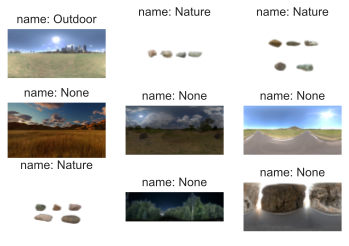

In [295]:
random_image = train[(train.is_tag_in == 1) & (train.category_name != 'Plants')].sample(n = 9)
random_image_paths = random_image['file'].values
random_image_type = random_image['subcategory_category_name'].values

for index, path in enumerate(random_image_paths):
    im = PIL.Image.open(DATA_DIR + str(path))
    plt.subplot(3, 3, index + 1)
    plt.imshow(im)
    plt.title('name: ' + str(random_image_type[index]))
    plt.axis('off')
plt.show()

In [ ]:
# немного дообогатили тренировочную выборку, добавив представителей имеющих нужные теги
# это должно очень хорошо сказаться на обобщающей способности, т.к.
# повотрояем трюк для V

In [300]:
Vehicles_tags = {}
for row in train[train.category_name == 'Vehicles'].tags: 
    for tag in row:
        Vehicles_tags[tag] = Vehicles_tags.get(tag, 0) +1

In [301]:
x = []
y = []
for key, value in Vehicles_tags.items():
    x.append(key)
    y.append(value)
axes = pd.DataFrame({'keys':x, 'values':y})

In [302]:
top10tags = list(axes.sort_values('values', ascending=False)['keys'][:10])
#top10tags.remove('decor')
top10tags

['sportcar',
 's-segment',
 'sedan',
 'luxury',
 'hatchback',
 'off-road',
 'coupe',
 's-class',
 'suv',
 'supercar']

In [303]:
def is_contain(tags):
    for tag in tags:
        if tag in top10tags:
            return 1
    return 0
#df['is_tag_in']= df['tags'].apply(lambda x: is_contain(x))
#df
train['v_tag']= train['tags'].apply(lambda x: is_contain(x))

In [305]:
train[(train.v_tag == 1) & (train.category_name != 'Vehicles')]

,id,tags,file,type_id,type_name,category_id,category_name,category_type_id,category_type_name,subcategory_id,subcategory_name,subcategory_category_id,subcategory_category_name,subcategory_category_type_id,subcategory_category_type_name,is_tag_in,v_tag
1366,2268,"[acanthus, baroque, classic, decor, furniture,...",data/8185d246-a6b8-44bb-846a-c4aac7d5d368.png,1,3D Models,7,Interior,1,3D Models,170.0,Decor,7.0,Interior,1.0,3D Models,1,1


In [306]:
# с Vehicles такой трюк не сработал

Важные выводы на этот момент:
1) изображения размером 360*360
2) изображение имеют правильную ориентацию( низ снизу, верх сверху)
3) данные в выборках имеют много пропусков
4) классы не сбалансированны, это мы постараемся исправить на этапе аугментации изображений(машины/растения/остальное)
5) есть изображения с фоном и без(+фон разный)
6) большая часть машин ч/б (модели)
7) выборки ОЧЕНЬ маленькие

План:
я решил взять предобученную модель, "отрезать голову" и дать на вход изображения в трех класах(машина/растение/остальное)

Собираем классы для обучения, сохраняем новый файл

In [326]:
target_class ={0:'other'
              ,1:'vehicles'
              ,2:'plants'}

def class_encoder(cell):
    for key, value in target_class.items():
        if cell.lower() == value.lower():
            return key
    return 0

In [327]:
train['target']= train.category_name.apply(lambda x: class_encoder(x))

In [340]:
train[(train.is_tag_in ==1)].sample(2)

,id,tags,file,type_id,type_name,category_id,category_name,category_type_id,category_type_name,subcategory_id,subcategory_name,subcategory_category_id,subcategory_category_name,subcategory_category_type_id,subcategory_category_type_name,is_tag_in,v_tag,target,target_2
514,3161,"[grass, meadow, nature, plants]",data/65e2012a-291c-4c10-9192-f78b6e90479f.png,1,3D Models,11,Plants,1,3D Models,93.0,Grass,11.0,Plants,1.0,3D Models,1,0,2,2
60,3084,"[exotic, forest, jungle, nature, plant, tree]",data/0b6cf3a8-428e-4f76-bc38-629b234289e6.png,1,3D Models,11,Plants,1,3D Models,90.0,Trees,11.0,Plants,1.0,3D Models,1,0,2,2


In [331]:
def more_plants(row):
    if row['is_tag_in'] == 1:
        return 2
    else:
        return row['target']
train['target']= train.apply(more_plants, axis=1)

In [332]:
for cl in train['target'].unique():
    print('количество представителей класса',target_class[cl],'=',  len(train[train['target'] == cl]))

количество представителей класса other = 1208
количество представителей класса vehicles = 175
количество представителей класса plants = 175


In [341]:
target = train[['file', 'target']]

In [343]:
pd.to_pickle(target, 'target_table.pickle')

In [344]:
target = pd.read_pickle('target_table.pickle')

In [347]:
target.sample(15)

,file,target
406,data/56b895dc-e1f2-4a51-8501-84a9ec406285.png,0
386,data/77bf4f2b-2817-41d3-a4cd-55affd0bf95d.png,0
66,data/ef9e1e46-3fef-4723-b5e2-5adb48d3e2e3.png,2
1170,data/a7edd270-5344-4a79-aa12-e48e47d4fc23.jpg,0
108,data/e2f0c9e5-0df6-470b-b85d-1cc905e004dd.png,0
708,data/fda33399-a262-4655-a8f3-9816c5310391.jpg,0
1156,data/1203ae87-f76f-4d1e-8178-2a0b03a18f4e.png,0
1246,data/a8e90323-a6fe-46fb-b5be-7f3509a852dd.jpg,0
964,data/1e183cb2-50e2-44b9-906b-8e9b01f57db3.png,0
359,data/d5d3b761-7140-4fa4-a1ec-b8145e6352ef.png,1
